<a href="https://colab.research.google.com/github/faithleo8/dsc-apis-lab/blob/master/hackathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv("/content/distribution-of-population-age-18-years-and-above-2019-census-volume-iv.csv")
df.head(10)

,Sub-County,Total*,Male,Female
0,KENYA,"28,729,203","14,014,340","14,713,949"
1,Rural*,"19,002,236","9,243,850","9,757,916"
2,Urban*,"9,726,967","4,770,490","4,956,033"
3,NaN,NaN,NaN,NaN
4,MOMBASA,"800,412","403,555","396,843"
5,CHANGAMWE,"90,685","47,934","42,752"
6,JOMVU,"106,109","54,315","51,792"
7,KISAUNI,"187,488","93,343","94,143"
8,LIKONI,"164,014","84,111","79,901"
9,MVITA,"104,255","49,260","54,994"


In [4]:
df.drop(df.index[:4],inplace=True)


In [5]:
df.head(5)

,Sub-County,Total*,Male,Female
4,MOMBASA,"800,412","403,555","396,843"
5,CHANGAMWE,"90,685","47,934","42,752"
6,JOMVU,"106,109","54,315","51,792"
7,KISAUNI,"187,488","93,343","94,143"
8,LIKONI,"164,014","84,111","79,901"


In [6]:
df.reset_index(level = None, inplace = True)

In [7]:
type(df)

pandas.core.frame.DataFrame

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   index       392 non-null    int64 
 1   Sub-County  392 non-null    object
 2   Total*      392 non-null    object
 3   Male        392 non-null    object
 4   Female      392 non-null    object
dtypes: int64(1), object(4)
memory usage: 15.4+ KB


In [9]:
columns_strip = ["Total*","Male","Female"]
df[columns_strip] = df[columns_strip].astype(str) 

df[columns_strip]=df[columns_strip].replace({'\$':'',',':''},regex=True)
df[columns_strip] = df[columns_strip].astype(float) 
df

,index,Sub-County,Total*,Male,Female
0,4,MOMBASA,800412.0,403555.0,396843.0
1,5,CHANGAMWE,90685.0,47934.0,42752.0
2,6,JOMVU,106109.0,54315.0,51792.0
3,7,KISAUNI,187488.0,93343.0,94143.0
4,8,LIKONI,164014.0,84111.0,79901.0
...,...,...,...,...,...
387,391,MAKADARA,136318.0,69464.0,66847.0
388,392,MATHARE,139987.0,73294.0,66681.0
389,393,NJIRU,415014.0,201895.0,213097.0
390,394,STAREHE,141916.0,70400.0,71508.0


In [10]:
df.drop(columns = "index")

,Sub-County,Total*,Male,Female
0,MOMBASA,800412.0,403555.0,396843.0
1,CHANGAMWE,90685.0,47934.0,42752.0
2,JOMVU,106109.0,54315.0,51792.0
3,KISAUNI,187488.0,93343.0,94143.0
4,LIKONI,164014.0,84111.0,79901.0
...,...,...,...,...
387,MAKADARA,136318.0,69464.0,66847.0
388,MATHARE,139987.0,73294.0,66681.0
389,NJIRU,415014.0,201895.0,213097.0
390,STAREHE,141916.0,70400.0,71508.0


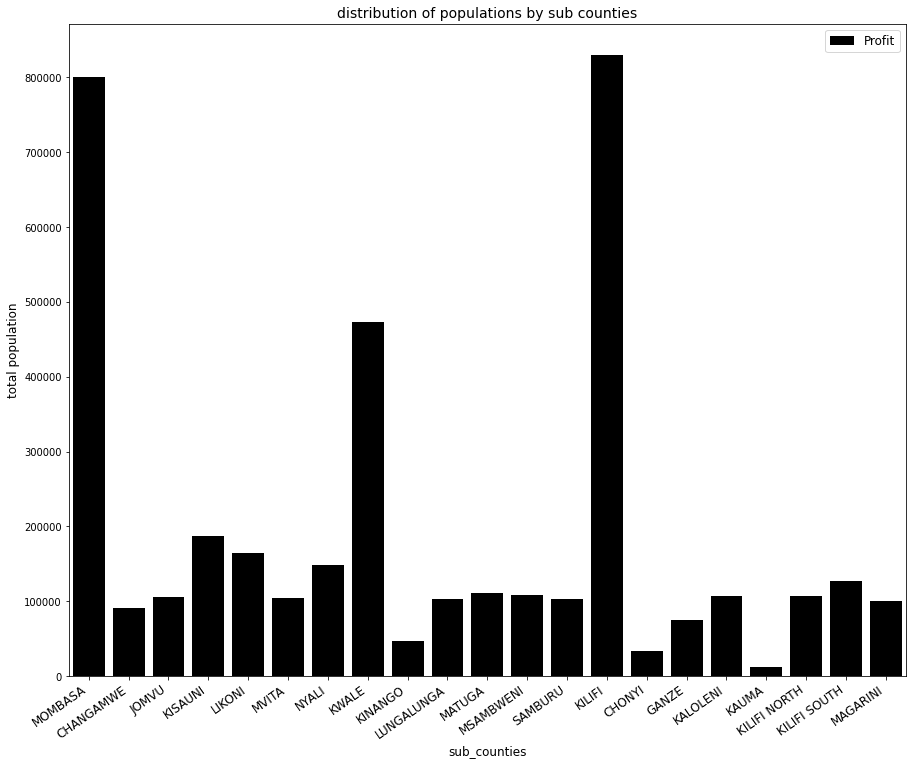

In [11]:
plt.figure(figsize=(15,12))
sns.barplot(x=df.loc[0:20, 'Sub-County'],y=df.loc[0:20, 'Total*'], 
            color='black', label='Profit', ci=None)
plt.xlabel('sub_counties', fontsize=12)
plt.title("distribution of populations by sub counties", fontsize=14)
plt.ylabel('total population', fontsize=12)
plt.xticks(rotation=35, horizontalalignment='right', fontsize=12)
plt.legend(fontsize=12);

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 50.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 80.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'distribution of population by counties')

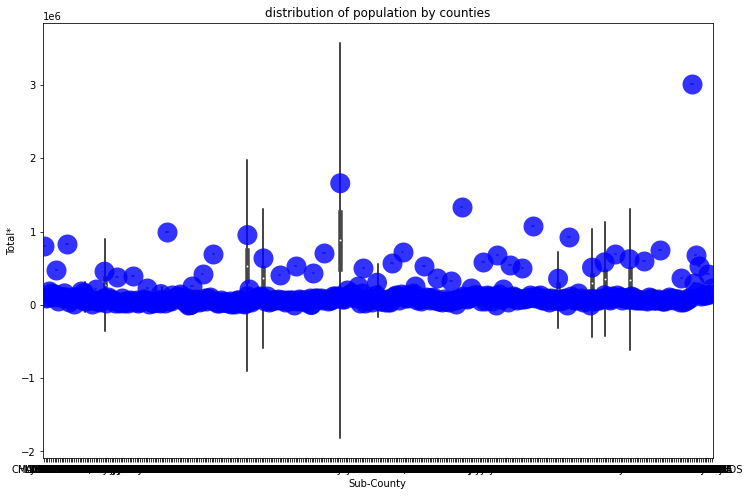

In [12]:
plt.figure(figsize=(12,8))
sns.violinplot(x='Sub-County',y="Total*", data=df, split='True', palette='rainbow')
sns.swarmplot(x='Sub-County',y="Total*", data=df, dodge='True', color='blue', alpha=.8, s=20)
plt.title("distribution of population by counties")

In [ ]:
#voters by constituency data

In [13]:
voters_registration = pd.read_excel("/content/votersconstituency-2.xlsx")
voters_registration.head()

,REGISTERED VOTERS PER CONSTITUENCY FOR 2017 GENERAL ELECTIONS,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,COUNTY_CODE,COUNTY_NAME,CONST_CODE,CONSTITUENCY_NAME,VOTERS,NO. OF POLLING STATIONS
1,001,MOMBASA,001,CHANGAMWE,86331,136
2,001,MOMBASA,002,JOMVU,69307,109
3,001,MOMBASA,003,KISAUNI,126151,198
4,001,MOMBASA,004,NYALI,104017,165


In [14]:
voters_registration.columns = voters_registration.iloc[0] 

voters_registration = voters_registration[1:]

voters_registration.head(10)

,COUNTY_CODE,COUNTY_NAME,CONST_CODE,CONSTITUENCY_NAME,VOTERS,NO. OF POLLING STATIONS
1,001,MOMBASA,001,CHANGAMWE,86331,136
2,001,MOMBASA,002,JOMVU,69307,109
3,001,MOMBASA,003,KISAUNI,126151,198
4,001,MOMBASA,004,NYALI,104017,165
5,001,MOMBASA,005,LIKONI,87326,140
6,001,MOMBASA,006,MVITA,107091,186
7,002,KWALE,007,MSAMBWENI,68621,129
8,002,KWALE,008,LUNGALUNGA,56948,118
9,002,KWALE,009,MATUGA,70366,153
10,002,KWALE,010,KINANGO,85106,212


In [15]:
voters_registration.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293 entries, 1 to 293
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   COUNTY_CODE              292 non-null    object
 1   COUNTY_NAME              292 non-null    object
 2   CONST_CODE               293 non-null    object
 3   CONSTITUENCY_NAME        292 non-null    object
 4   VOTERS                   293 non-null    object
 5   NO. OF POLLING STATIONS  293 non-null    object
dtypes: object(6)
memory usage: 13.9+ KB


In [16]:
voters_registration["VOTERS"] = voters_registration["VOTERS"].astype(float)

In [17]:
voters_registration.head()

,COUNTY_CODE,COUNTY_NAME,CONST_CODE,CONSTITUENCY_NAME,VOTERS,NO. OF POLLING STATIONS
1,001,MOMBASA,001,CHANGAMWE,86331.0,136
2,001,MOMBASA,002,JOMVU,69307.0,109
3,001,MOMBASA,003,KISAUNI,126151.0,198
4,001,MOMBASA,004,NYALI,104017.0,165
5,001,MOMBASA,005,LIKONI,87326.0,140


In [18]:
voters_registration.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293 entries, 1 to 293
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   COUNTY_CODE              292 non-null    object 
 1   COUNTY_NAME              292 non-null    object 
 2   CONST_CODE               293 non-null    object 
 3   CONSTITUENCY_NAME        292 non-null    object 
 4   VOTERS                   293 non-null    float64
 5   NO. OF POLLING STATIONS  293 non-null    object 
dtypes: float64(1), object(5)
memory usage: 13.9+ KB


In [22]:
voters_registration.drop(labels=["NO. OF POLLING STATIONS"], axis=1,inplace= True)

In [21]:
voters_registration.head()

,COUNTY_CODE,COUNTY_NAME,CONST_CODE,CONSTITUENCY_NAME,VOTERS,NO. OF POLLING STATIONS
1,001,MOMBASA,001,CHANGAMWE,86331.0,136
2,001,MOMBASA,002,JOMVU,69307.0,109
3,001,MOMBASA,003,KISAUNI,126151.0,198
4,001,MOMBASA,004,NYALI,104017.0,165
5,001,MOMBASA,005,LIKONI,87326.0,140


In [23]:
voters_registration.head()

,COUNTY_CODE,COUNTY_NAME,CONST_CODE,CONSTITUENCY_NAME,VOTERS
1,001,MOMBASA,001,CHANGAMWE,86331.0
2,001,MOMBASA,002,JOMVU,69307.0
3,001,MOMBASA,003,KISAUNI,126151.0
4,001,MOMBASA,004,NYALI,104017.0
5,001,MOMBASA,005,LIKONI,87326.0


In [24]:
voters_registration.rename(columns = {'CONSTITUENCY_NAME':'Sub-County'}, inplace = True)

In [25]:
voters_registration.head()

,COUNTY_CODE,COUNTY_NAME,CONST_CODE,Sub-County,VOTERS
1,001,MOMBASA,001,CHANGAMWE,86331.0
2,001,MOMBASA,002,JOMVU,69307.0
3,001,MOMBASA,003,KISAUNI,126151.0
4,001,MOMBASA,004,NYALI,104017.0
5,001,MOMBASA,005,LIKONI,87326.0


In [27]:
new_df = pd.merge(df, voters_registration, left_index=True, right_index=True)

In [28]:
new_df

,index,Sub-County_x,Total*,Male,Female,COUNTY_CODE,COUNTY_NAME,CONST_CODE,Sub-County_y,VOTERS
1,5,CHANGAMWE,90685.0,47934.0,42752.0,001,MOMBASA,001,CHANGAMWE,86331.0
2,6,JOMVU,106109.0,54315.0,51792.0,001,MOMBASA,002,JOMVU,69307.0
3,7,KISAUNI,187488.0,93343.0,94143.0,001,MOMBASA,003,KISAUNI,126151.0
4,8,LIKONI,164014.0,84111.0,79901.0,001,MOMBASA,004,NYALI,104017.0
5,9,MVITA,104255.0,49260.0,54994.0,001,MOMBASA,005,LIKONI,87326.0
...,...,...,...,...,...,...,...,...,...,...
289,293,KAKAMEGA CENTRAL,118228.0,57578.0,60649.0,047,NAIROBI CITY,289,STAREHE,166397.0
290,294,KAKAMEGA EAST,99107.0,46350.0,52754.0,047,NAIROBI CITY,290,MATHARE,115559.0
291,295,KAKAMEGA NORTH,134821.0,63893.0,70927.0,048,DIASPORA,291,DIASPORA,4393.0
292,296,KAKAMEGA SOUTH,66936.0,30943.0,35993.0,049,PRISONS,292,PRISONS,5528.0


In [30]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 293 entries, 1 to 293
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         293 non-null    int64  
 1   Sub-County_x  293 non-null    object 
 2   Total*        293 non-null    float64
 3   Male          293 non-null    float64
 4   Female        293 non-null    float64
 5   COUNTY_CODE   292 non-null    object 
 6   COUNTY_NAME   292 non-null    object 
 7   CONST_CODE    293 non-null    object 
 8   Sub-County_y  292 non-null    object 
 9   VOTERS        293 non-null    float64
dtypes: float64(4), int64(1), object(5)
memory usage: 25.2+ KB


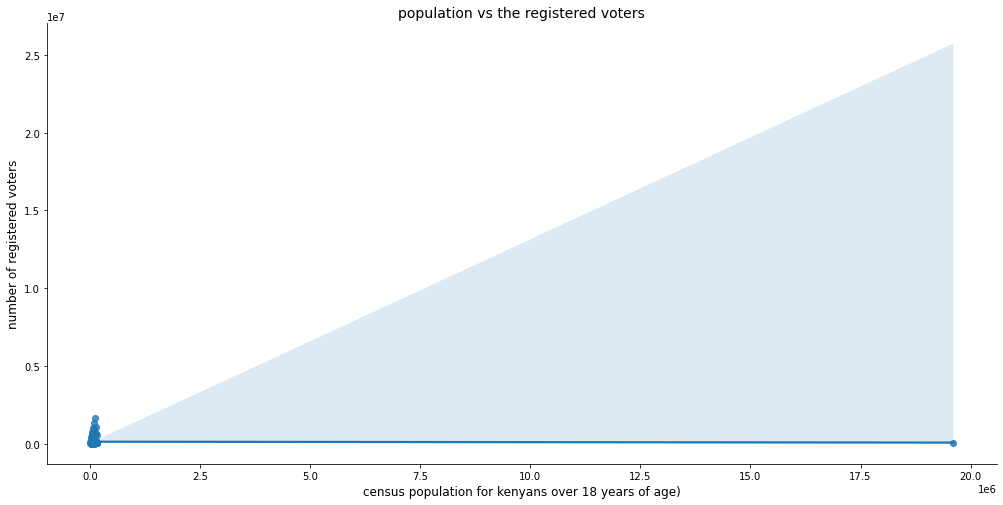

In [35]:
#scatter plot to show the relationship of the registered voter vs the population census of those over 18.
sns.lmplot(x='VOTERS', y='Total*', data = new_df, height=7, aspect=2)
plt.xlabel('census population for kenyans over 18 years of age)', fontsize=12)
plt.ticklabel_format(axis='x', style='sci', scilimits=(6,6))
plt.ylabel('number of registered voters', fontsize=12)
plt.title('population vs the registered voters', fontsize=14);

As population increases of the people above 18 years in the census population, theres an increase in the number of voters with a gap between the actual population who are suppoosed to register voting. This can be attributed to the fact that the percentage of the those who dont register as voters although have attained the voting age could be lacking the proper education on the importance of voting.